<a href="https://colab.research.google.com/github/muchaimaryanne/Capstone_Customer_Churn_Prediction/blob/main/Copy_of_Copy_of_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction

This challenge is for an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each customer “churning,” i.e. becoming inactive and not making any transactions for 90 days.

This solution will help this telecom company to better serve their customers by understanding which customers are at risk of leaving.

In [1]:
!pip install pandas
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importation

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

In [4]:
# Disable pandas warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Data Loading

In [5]:
train = pd.read_csv("drive/My Drive/Colab Notebooks/Train.csv")
train


,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,56e22fe3312a48cf860b043a021dab275383a20a,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,16,NaN,NaN,0
1077020,587b72930e4d36b3fb94a18c3ef65c2079460eee,TAMBACOUNDA,K > 24 month,2500.0,5.0,2500.0,833.0,5.0,0.0,15.0,77.0,NaN,NaN,NaN,NO,34,All-net 500F=2000F;5d,2.0,0
1077021,d6831b8edacb7d9928b3f053fb1283574577ae42,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,1
1077022,cb1f6510b084173c0deae49095f35ac29f916701,NaN,K > 24 month,600.0,1.0,600.0,200.0,1.0,591.0,11.0,37.0,5.0,1.0,NaN,NO,16,All-net 600F= 3000F ;5d,1.0,0


In [6]:
# import the test dataset
test = pd.read_csv("drive/My Drive/Colab Notebooks/Test.csv")
test

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190058,1092956a3dad77ceb7e8d7c70e3e13f77b60e2aa,DAKAR,F 9-12 month,500.0,1.0,506.0,169.0,1.0,0.0,26.0,NaN,NaN,6.0,NaN,NO,14,All-net 500F=2000F;5d,1.0
190059,bec10becca7faa8e9cab9981b3aee5e9a7f04828,DAKAR,K > 24 month,2000.0,4.0,2000.0,667.0,5.0,0.0,8.0,54.0,NaN,NaN,NaN,NO,29,All-net 500F =2000F_AllNet_Unlimited,3.0
190060,7ac6fc191f8732b1b146e57f9ede983626b93eae,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
190061,d592c81971d6120b0d19f9ace85f278ea21b89a0,NaN,K > 24 month,300.0,2.0,298.0,99.0,2.0,0.0,1.0,2.0,NaN,NaN,NaN,NO,12,NaN,NaN


# Hypothesis and Business Understanding.

In this section we will state ou null and altrenate hypothesis, as well as our research questions.

**Hypothesis:** Clients that are less active within 90 days are more likely to churn.

**Alternate hypothesis:** Clients that are less active within 90 days are not more likely to churn.

**Questions:**

1.   Does being inactive in 90 day indicate churn?
2.   Which region has the highest levels of churn?
3.   Do clients who bring in more money churn less than those who bring less money?



# EDA

Examining and visualizing the data to uncover patterns, identify relationships, and gain insights from the data.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

The data has 14 numerical columns and 5 categorical columns.

Renaming the columns to make it easier to understand the data

In [8]:
train = train.rename(columns={'MONTANT': 'Top up amount', 'FREQUENCE_RECH': 'No of refills', 'REVENUE': 'Income per client','ARPU_SEGMENT': 'Income over 90 days/3','FREQUENCE': 'Frequency of income per client','DATA_VOLUME': 'Connections','ON_NET': 'Inter expresso calls','REGULARITY': 'Activity in 90 days','FREQ_TOP_PACK': 'Freq using top pack'})

In [9]:
train

,user_id,REGION,TENURE,Top up amount,No of refills,Income per client,Income over 90 days/3,Frequency of income per client,Connections,Inter expresso calls,ORANGE,TIGO,ZONE1,ZONE2,MRG,Activity in 90 days,TOP_PACK,Freq using top pack,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,56e22fe3312a48cf860b043a021dab275383a20a,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,16,NaN,NaN,0
1077020,587b72930e4d36b3fb94a18c3ef65c2079460eee,TAMBACOUNDA,K > 24 month,2500.0,5.0,2500.0,833.0,5.0,0.0,15.0,77.0,NaN,NaN,NaN,NO,34,All-net 500F=2000F;5d,2.0,0
1077021,d6831b8edacb7d9928b3f053fb1283574577ae42,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,1
1077022,cb1f6510b084173c0deae49095f35ac29f916701,NaN,K > 24 month,600.0,1.0,600.0,200.0,1.0,591.0,11.0,37.0,5.0,1.0,NaN,NO,16,All-net 600F= 3000F ;5d,1.0,0


In [10]:
test = test.rename(columns={'MONTANT': 'Top up amount', 'FREQUENCE_RECH': 'No of refills', 'REVENUE': 'Income per client','ARPU_SEGMENT': 'Income over 90 days/3','FREQUENCE': 'Frequency of income per client','DATA_VOLUME': 'Connections','ON_NET': 'Inter expresso calls','REGULARITY': 'Activity in 90 days','FREQ_TOP_PACK': 'Freq using top pack'})
test

,user_id,REGION,TENURE,Top up amount,No of refills,Income per client,Income over 90 days/3,Frequency of income per client,Connections,Inter expresso calls,ORANGE,TIGO,ZONE1,ZONE2,MRG,Activity in 90 days,TOP_PACK,Freq using top pack
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190058,1092956a3dad77ceb7e8d7c70e3e13f77b60e2aa,DAKAR,F 9-12 month,500.0,1.0,506.0,169.0,1.0,0.0,26.0,NaN,NaN,6.0,NaN,NO,14,All-net 500F=2000F;5d,1.0
190059,bec10becca7faa8e9cab9981b3aee5e9a7f04828,DAKAR,K > 24 month,2000.0,4.0,2000.0,667.0,5.0,0.0,8.0,54.0,NaN,NaN,NaN,NO,29,All-net 500F =2000F_AllNet_Unlimited,3.0
190060,7ac6fc191f8732b1b146e57f9ede983626b93eae,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
190061,d592c81971d6120b0d19f9ace85f278ea21b89a0,NaN,K > 24 month,300.0,2.0,298.0,99.0,2.0,0.0,1.0,2.0,NaN,NaN,NaN,NO,12,NaN,NaN


Dropping id column

In [11]:
train = train.drop('user_id', axis=1)
train

,REGION,TENURE,Top up amount,No of refills,Income per client,Income over 90 days/3,Frequency of income per client,Connections,Inter expresso calls,ORANGE,TIGO,ZONE1,ZONE2,MRG,Activity in 90 days,TOP_PACK,Freq using top pack,CHURN
0,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,16,NaN,NaN,0
1077020,TAMBACOUNDA,K > 24 month,2500.0,5.0,2500.0,833.0,5.0,0.0,15.0,77.0,NaN,NaN,NaN,NO,34,All-net 500F=2000F;5d,2.0,0
1077021,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,1
1077022,NaN,K > 24 month,600.0,1.0,600.0,200.0,1.0,591.0,11.0,37.0,5.0,1.0,NaN,NO,16,All-net 600F= 3000F ;5d,1.0,0


In [12]:
test = test.drop('user_id', axis=1)
test

,REGION,TENURE,Top up amount,No of refills,Income per client,Income over 90 days/3,Frequency of income per client,Connections,Inter expresso calls,ORANGE,TIGO,ZONE1,ZONE2,MRG,Activity in 90 days,TOP_PACK,Freq using top pack
0,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190058,DAKAR,F 9-12 month,500.0,1.0,506.0,169.0,1.0,0.0,26.0,NaN,NaN,6.0,NaN,NO,14,All-net 500F=2000F;5d,1.0
190059,DAKAR,K > 24 month,2000.0,4.0,2000.0,667.0,5.0,0.0,8.0,54.0,NaN,NaN,NaN,NO,29,All-net 500F =2000F_AllNet_Unlimited,3.0
190060,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
190061,NaN,K > 24 month,300.0,2.0,298.0,99.0,2.0,0.0,1.0,2.0,NaN,NaN,NaN,NO,12,NaN,NaN


Cleaning the data and finding issues with the data.

In [13]:
train.isnull().sum()

REGION                             424337
TENURE                                  0
Top up amount                      377885
No of refills                      377885
Income per client                  362355
Income over 90 days/3              362355
Frequency of income per client     362355
Connections                        529763
Inter expresso calls               393174
ORANGE                             447144
TIGO                               644774
ZONE1                              992126
ZONE2                             1008230
MRG                                     0
Activity in 90 days                     0
TOP_PACK                           450895
Freq using top pack                450895
CHURN                                   0
dtype: int64

In [14]:
test.isnull().sum()

REGION                             74733
TENURE                                 0
Top up amount                      66368
No of refills                      66368
Income per client                  63641
Income over 90 days/3              63641
Frequency of income per client     63641
Connections                        93347
Inter expresso calls               69292
ORANGE                             78646
TIGO                              113508
ZONE1                             175213
ZONE2                             178052
MRG                                    0
Activity in 90 days                    0
TOP_PACK                           79290
Freq using top pack                79290
dtype: int64

In [15]:
train.isna().sum()

REGION                             424337
TENURE                                  0
Top up amount                      377885
No of refills                      377885
Income per client                  362355
Income over 90 days/3              362355
Frequency of income per client     362355
Connections                        529763
Inter expresso calls               393174
ORANGE                             447144
TIGO                               644774
ZONE1                              992126
ZONE2                             1008230
MRG                                     0
Activity in 90 days                     0
TOP_PACK                           450895
Freq using top pack                450895
CHURN                                   0
dtype: int64

The data has many missing values.

In [16]:
train['TENURE'].unique()

array(['K > 24 month', 'E 6-9 month', 'H 15-18 month', 'G 12-15 month',
       'I 18-21 month', 'J 21-24 month', 'F 9-12 month', 'D 3-6 month'],
      dtype=object)

In [17]:
train['MRG'].unique()

array(['NO'], dtype=object)

In [18]:
train['Activity in 90 days'].unique()

array([62,  3,  1, 61, 56,  6, 10,  2, 16, 43,  8, 18, 12, 24, 54, 29, 14,
       40, 23, 52, 60, 34, 13, 46, 47, 31,  9, 58, 38, 36, 19,  5, 39, 55,
       27,  4, 32, 26, 17, 48, 22, 53, 59, 20, 44,  7, 41, 49, 33, 42, 28,
       30, 15, 57, 21, 11, 45, 50, 25, 37, 51, 35])

In [19]:
train['CHURN'].unique()

array([0, 1])

In [20]:
train['REGION'].unique()

array(['DAKAR', nan, 'SAINT-LOUIS', 'THIES', 'LOUGA', 'MATAM', 'FATICK',
       'KAOLACK', 'DIOURBEL', 'TAMBACOUNDA', 'ZIGUINCHOR', 'KOLDA',
       'KAFFRINE', 'SEDHIOU', 'KEDOUGOU'], dtype=object)

In [21]:
train['TOP_PACK'].unique()

array(['On net 200F=Unlimited _call24H', nan, 'Data:490F=1GB,7d',
       'All-net 500F=2000F;5d', 'On-net 500=4000,10d',
       'Data:3000F=10GB,30d', 'Data:200F=Unlimited,24H',
       'IVR Echat_Daily_50F', 'Data:1000F=2GB,30d',
       'Mixt 250F=Unlimited_call24H', 'On-net 1000F=10MilF;10d',
       'MIXT:500F= 2500F on net _2500F off net;2d',
       'Data: 200 F=100MB,24H', 'All-net 600F= 3000F ;5d',
       'On-net 200F=60mn;1d', 'Twter_U2opia_Daily',
       'Data: 100 F=40MB,24H', 'All-net 500F =2000F_AllNet_Unlimited',
       'On net 200F= 3000F_10Mo ;24H', '200=Unlimited1Day', 'Jokko_Daily',
       'Data:1000F=5GB,7d', 'Data:700F=1.5GB,7d', 'All-net 1000=5000;5d',
       'Data:150F=SPPackage1,24H', 'IVR Echat_Monthly_500F',
       'VAS(IVR_Radio_Daily)', 'MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t',
       'MIXT: 200mnoff net _unl on net _5Go;30d', 'On-net 500F_FNF;3d',
       'MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t',
       'Data:1500F=3GB,30D', 'Data:300F=100MB,2d', 'Data:500F

In [22]:
# Replace missing values in train with median for numerical values
train.fillna(train.median(),inplace =True)

In [23]:
# Replace missing values in test with median for numerical values
test.fillna(test.median(),inplace =True)

In [24]:
train.isnull().sum()

REGION                            424337
TENURE                                 0
Top up amount                          0
No of refills                          0
Income per client                      0
Income over 90 days/3                  0
Frequency of income per client         0
Connections                            0
Inter expresso calls                   0
ORANGE                                 0
TIGO                                   0
ZONE1                                  0
ZONE2                                  0
MRG                                    0
Activity in 90 days                    0
TOP_PACK                          450895
Freq using top pack                    0
CHURN                                  0
dtype: int64

In [25]:
test.isnull().sum()

REGION                            74733
TENURE                                0
Top up amount                         0
No of refills                         0
Income per client                     0
Income over 90 days/3                 0
Frequency of income per client        0
Connections                           0
Inter expresso calls                  0
ORANGE                                0
TIGO                                  0
ZONE1                                 0
ZONE2                                 0
MRG                                   0
Activity in 90 days                   0
TOP_PACK                          79290
Freq using top pack                   0
dtype: int64

In [26]:
# Getting the mode in the Region column to replace missing values.
train['REGION'].mode()

0    DAKAR
Name: REGION, dtype: object

In [27]:
# Getting the mode in the Region column to replace missing values.
test['REGION'].mode()

0    DAKAR
Name: REGION, dtype: object

In [28]:
# Replacing missing values in REGION with mode DAKAR in train

train['REGION'].fillna('DAKAR', inplace=True)


In [29]:
# Replacing missing values in REGION with mode DAKAR in test

test['REGION'].fillna('DAKAR', inplace=True)

In [30]:
train.isnull().sum()

REGION                                 0
TENURE                                 0
Top up amount                          0
No of refills                          0
Income per client                      0
Income over 90 days/3                  0
Frequency of income per client         0
Connections                            0
Inter expresso calls                   0
ORANGE                                 0
TIGO                                   0
ZONE1                                  0
ZONE2                                  0
MRG                                    0
Activity in 90 days                    0
TOP_PACK                          450895
Freq using top pack                    0
CHURN                                  0
dtype: int64

In [31]:
test.isnull().sum()

REGION                                0
TENURE                                0
Top up amount                         0
No of refills                         0
Income per client                     0
Income over 90 days/3                 0
Frequency of income per client        0
Connections                           0
Inter expresso calls                  0
ORANGE                                0
TIGO                                  0
ZONE1                                 0
ZONE2                                 0
MRG                                   0
Activity in 90 days                   0
TOP_PACK                          79290
Freq using top pack                   0
dtype: int64

In [32]:
train['REGION'].unique()

array(['DAKAR', 'SAINT-LOUIS', 'THIES', 'LOUGA', 'MATAM', 'FATICK',
       'KAOLACK', 'DIOURBEL', 'TAMBACOUNDA', 'ZIGUINCHOR', 'KOLDA',
       'KAFFRINE', 'SEDHIOU', 'KEDOUGOU'], dtype=object)

In [33]:
 # Getting the mode in the TOP_PACK  column to replace missing values in train.
train['TOP_PACK'].mode()

0    All-net 500F=2000F;5d
Name: TOP_PACK, dtype: object

In [34]:
# Getting the mode in the TOP_PACK  column to replace missing values in test.
test['TOP_PACK'].mode()

0    All-net 500F=2000F;5d
Name: TOP_PACK, dtype: object

In [35]:
# Replacing missing values in TOP_PACK with mode All-net 500F=2000F;5d in train

train['TOP_PACK'].fillna('All-net 500F=2000F', inplace=True)

In [36]:
# Replacing missing values in TOP_PACK with mode All-net 500F=2000F;5d in test

test['TOP_PACK'].fillna('All-net 500F=2000F', inplace=True)

In [37]:
train['TOP_PACK'].unique()

array(['On net 200F=Unlimited _call24H', 'All-net 500F=2000F',
       'Data:490F=1GB,7d', 'All-net 500F=2000F;5d', 'On-net 500=4000,10d',
       'Data:3000F=10GB,30d', 'Data:200F=Unlimited,24H',
       'IVR Echat_Daily_50F', 'Data:1000F=2GB,30d',
       'Mixt 250F=Unlimited_call24H', 'On-net 1000F=10MilF;10d',
       'MIXT:500F= 2500F on net _2500F off net;2d',
       'Data: 200 F=100MB,24H', 'All-net 600F= 3000F ;5d',
       'On-net 200F=60mn;1d', 'Twter_U2opia_Daily',
       'Data: 100 F=40MB,24H', 'All-net 500F =2000F_AllNet_Unlimited',
       'On net 200F= 3000F_10Mo ;24H', '200=Unlimited1Day', 'Jokko_Daily',
       'Data:1000F=5GB,7d', 'Data:700F=1.5GB,7d', 'All-net 1000=5000;5d',
       'Data:150F=SPPackage1,24H', 'IVR Echat_Monthly_500F',
       'VAS(IVR_Radio_Daily)', 'MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t',
       'MIXT: 200mnoff net _unl on net _5Go;30d', 'On-net 500F_FNF;3d',
       'MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t',
       'Data:1500F=3GB,30D', 'Data:300F=100M

In [38]:
train.isnull().sum()


REGION                            0
TENURE                            0
Top up amount                     0
No of refills                     0
Income per client                 0
Income over 90 days/3             0
Frequency of income per client    0
Connections                       0
Inter expresso calls              0
ORANGE                            0
TIGO                              0
ZONE1                             0
ZONE2                             0
MRG                               0
Activity in 90 days               0
TOP_PACK                          0
Freq using top pack               0
CHURN                             0
dtype: int64

In [39]:
test.isnull().sum()

REGION                            0
TENURE                            0
Top up amount                     0
No of refills                     0
Income per client                 0
Income over 90 days/3             0
Frequency of income per client    0
Connections                       0
Inter expresso calls              0
ORANGE                            0
TIGO                              0
ZONE1                             0
ZONE2                             0
MRG                               0
Activity in 90 days               0
TOP_PACK                          0
Freq using top pack               0
dtype: int64

# Univariate Data Analysis

Which region has the highest representation.

In [40]:
Region_count = train['REGION'].value_counts()
Region_count

DAKAR          680596
THIES           90171
SAINT-LOUIS     59895
LOUGA           49679
KAOLACK         48498
DIOURBEL        33564
TAMBACOUNDA     27562
KAFFRINE        22067
KOLDA           19464
FATICK          17775
MATAM           14650
ZIGUINCHOR      11036
SEDHIOU          1553
KEDOUGOU          514
Name: REGION, dtype: int64

Text(0.5, 1.0, 'Distribution of Regions')

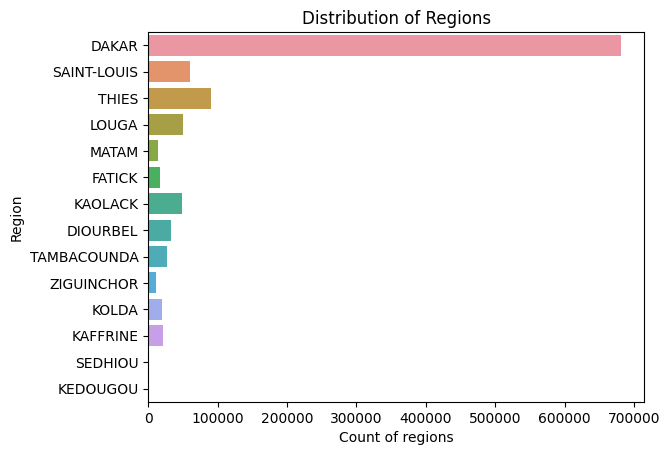

In [41]:
sns.countplot(data=train, y='REGION')

plt.xlabel('Count of regions')
plt.ylabel('Region')
plt.title('Distribution of Regions')



Dakar is the most represented region.

What is the longest and shortest tenures

Text(0.5, 1.0, 'Distribution of Tenure')

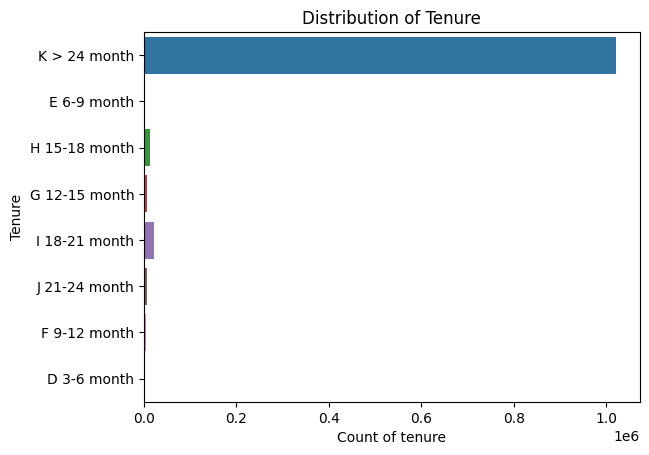

In [42]:
sns.countplot(data=train, y='TENURE')

plt.xlabel('Count of tenure')
plt.ylabel('Tenure')
plt.title('Distribution of Tenure')

Most of the customers have been with the company for over 24 months.

What is the most popular Top_up pack.

Text(0.5, 1.0, 'Count of Top_up packs')

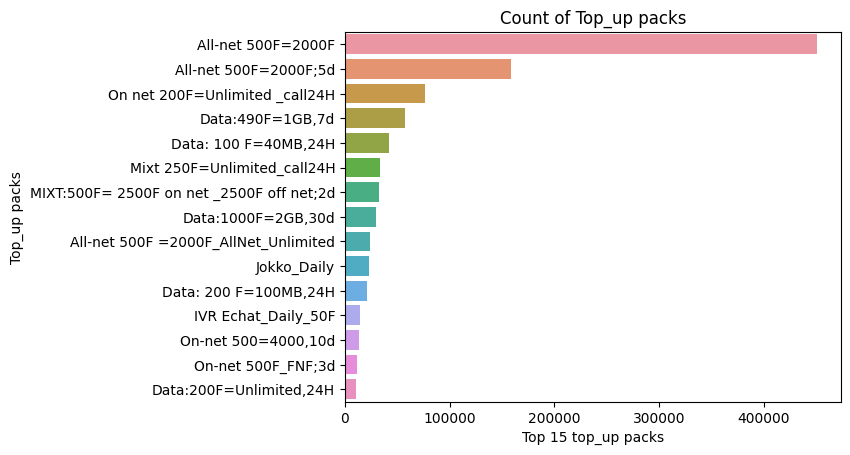

In [43]:
Top_15_top_up_packs = train['TOP_PACK'].value_counts().sort_values(ascending=False).head(15)
sns.barplot(x=Top_15_top_up_packs.values, y=Top_15_top_up_packs.index,orient='h')

plt.xlabel('Top 15 top_up packs')
plt.ylabel('Top_up packs')
plt.title('Count of Top_up packs')

The most popular one is All-net 500F=2000F.

Is the data set balanced

In [44]:
Churn_count = train['CHURN'].value_counts()
Churn_count

0    875031
1    201993
Name: CHURN, dtype: int64

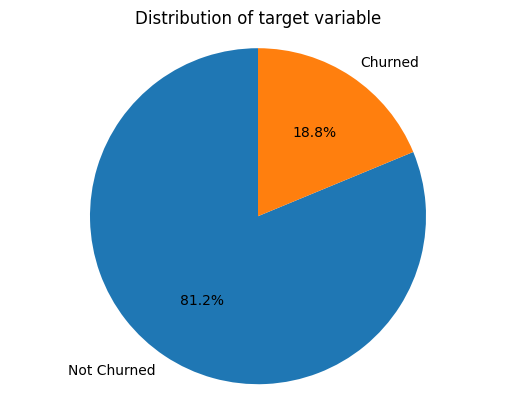

In [45]:
Churn_count = train['CHURN'].value_counts()
Churn_lables = ['Not Churned','Churned']
plt.pie(Churn_count,labels=Churn_lables, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of target variable')
plt.show()

The data set is imbalanced.

# Bi Variate Data Analysis

1. Does being inactive in 90 day indicate churn?

In [46]:
train['Activity in 90 days'].unique()

array([62,  3,  1, 61, 56,  6, 10,  2, 16, 43,  8, 18, 12, 24, 54, 29, 14,
       40, 23, 52, 60, 34, 13, 46, 47, 31,  9, 58, 38, 36, 19,  5, 39, 55,
       27,  4, 32, 26, 17, 48, 22, 53, 59, 20, 44,  7, 41, 49, 33, 42, 28,
       30, 15, 57, 21, 11, 45, 50, 25, 37, 51, 35])

In [47]:
#Finding the level of inactivity of customers who churned
level_of_inactive = pd.DataFrame(train.loc[train['CHURN'] == 1, 'Activity in 90 days']).sort_values('Activity in 90 days',ascending=False)
level_of_inactive

,Activity in 90 days
1008500,62
1034363,62
984031,62
239409,62
242278,62
...,...
376392,1
376396,1
781345,1
376400,1


In [48]:
#Picking only the unique values for level of inactivity
unique_level_of_inactive = pd.DataFrame(level_of_inactive['Activity in 90 days'].unique())
unique_level_of_inactive

,0
0,62
1,61
2,60
3,59
4,58
...,...
57,5
58,4
59,3
60,2


In [49]:
# Rename the column 0
unique_level_of_inactive = unique_level_of_inactive.rename(columns={0: 'Activity in 90 days'})
unique_level_of_inactive

,Activity in 90 days
0,62
1,61
2,60
3,59
4,58
...,...
57,5
58,4
59,3
60,2


There are customers with really high levels of activity in the 90 days and still are among those who churned. So inactivity does not indicate likelihood of churning.

Which region has the highest levels of churn?

In [50]:
# Regions that churned
Regions_that_churned = pd.DataFrame(train.loc[train['CHURN'] == 1, 'REGION']).sort_values('REGION',ascending=False)
Regions_that_churned

,REGION
271477,ZIGUINCHOR
274161,ZIGUINCHOR
50310,ZIGUINCHOR
116216,ZIGUINCHOR
711210,ZIGUINCHOR
...,...
362963,DAKAR
362965,DAKAR
362976,DAKAR
362978,DAKAR


In [51]:
# Finding value count of the regions
region_counts = Regions_that_churned['REGION'].value_counts()

In [52]:
# Convert the series to a df
region_counts = region_counts.reset_index()


In [53]:
region_counts

,index,REGION
0,DAKAR,195084
1,THIES,1499
2,KAOLACK,1204
3,DIOURBEL,919
4,LOUGA,799
5,SAINT-LOUIS,728
6,TAMBACOUNDA,437
7,ZIGUINCHOR,303
8,MATAM,302
9,FATICK,243


In [54]:
# Renaming the columns
region_counts.columns = ['REGION', 'COUNT']
region_counts

,REGION,COUNT
0,DAKAR,195084
1,THIES,1499
2,KAOLACK,1204
3,DIOURBEL,919
4,LOUGA,799
5,SAINT-LOUIS,728
6,TAMBACOUNDA,437
7,ZIGUINCHOR,303
8,MATAM,302
9,FATICK,243


<Axes: xlabel='COUNT', ylabel='REGION'>

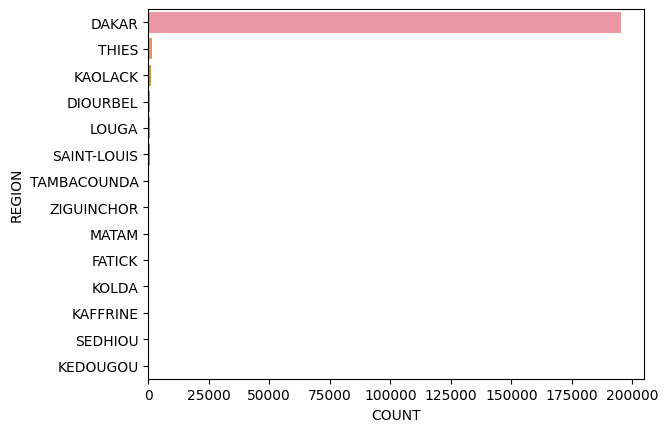

In [55]:
# Plotting the above data

sns.barplot(x='COUNT', y='REGION', data=region_counts, orient='h')

Dakar has the highest level of churn.

Do clients who bring in more money churn less than those who bring less money?

In [56]:
# Data for customer income vs churn level
Income_and_churn = pd.DataFrame(train.loc[train['CHURN'] == 1 , 'Income per client']).sort_values('Income per client',ascending=False)
Income_and_churn

,Income per client
19764,323541.0
308321,272191.0
1038953,116829.0
558514,104876.0
645236,88688.0
...,...
962982,1.0
256460,1.0
364651,1.0
44763,1.0


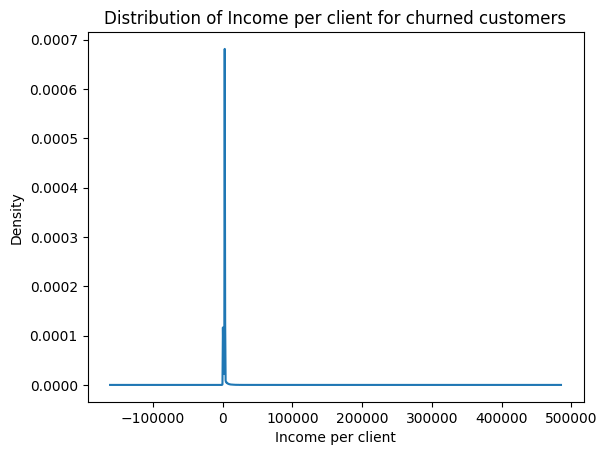

In [57]:
# A density plot for the above data.
Income_and_churn['Income per client'].plot.kde()
plt.xlabel('Income per client')
plt.ylabel('Density')
plt.title('Distribution of Income per client for churned customers')
plt.show()

There were customers with really high incomes that also churned.

In [58]:
# Data for customer income vs churn level
Income_and_not_churning = pd.DataFrame(train.loc[train['CHURN'] == 0 , 'Income per client']).sort_values('Income per client',ascending=False)
Income_and_not_churning

,Income per client
1015786,532177.0
309623,266050.0
773217,244001.0
992430,240094.0
747324,233413.0
...,...
1008442,1.0
106575,1.0
520143,1.0
518249,1.0


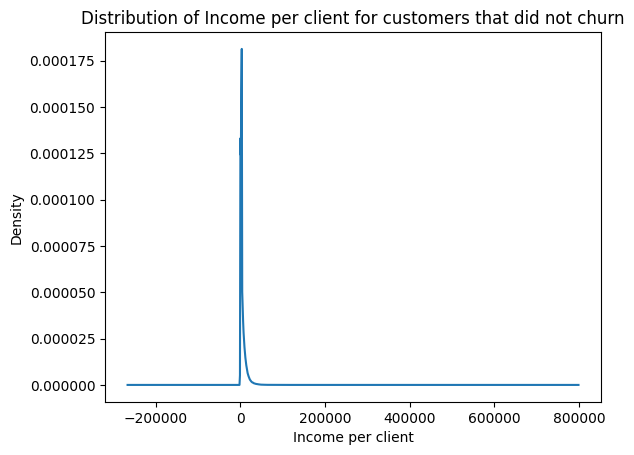

In [59]:
Income_and_not_churning['Income per client'].plot.kde()
plt.xlabel('Income per client')
plt.ylabel('Density')
plt.title('Distribution of Income per client for customers that did not churn')
plt.show()

There are customers with really low incomes and did not churn.

# Multivariate Data Analysis

In [60]:
categorical_columns = ['TENURE', 'REGION', 'MRG']

In [61]:
# Creating subplots to show distribution of categorical columns.



def plot_categorical_distribution(df, columns, ncols=2, top_n=15):
    nrows = (len(columns) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
    fig.tight_layout(pad=5)

    for i, column in enumerate(columns):
        ax = axes[i // ncols, i % ncols]
        value_counts = df[column].value_counts().head(top_n)
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)

    # Remove empty subplots if the number of columns is not a multiple of ncols
    if len(columns) % ncols != 0:
        for j in range(len(columns) % ncols, ncols):
            fig.delaxes(axes[nrows-1, j])

    plt.show()


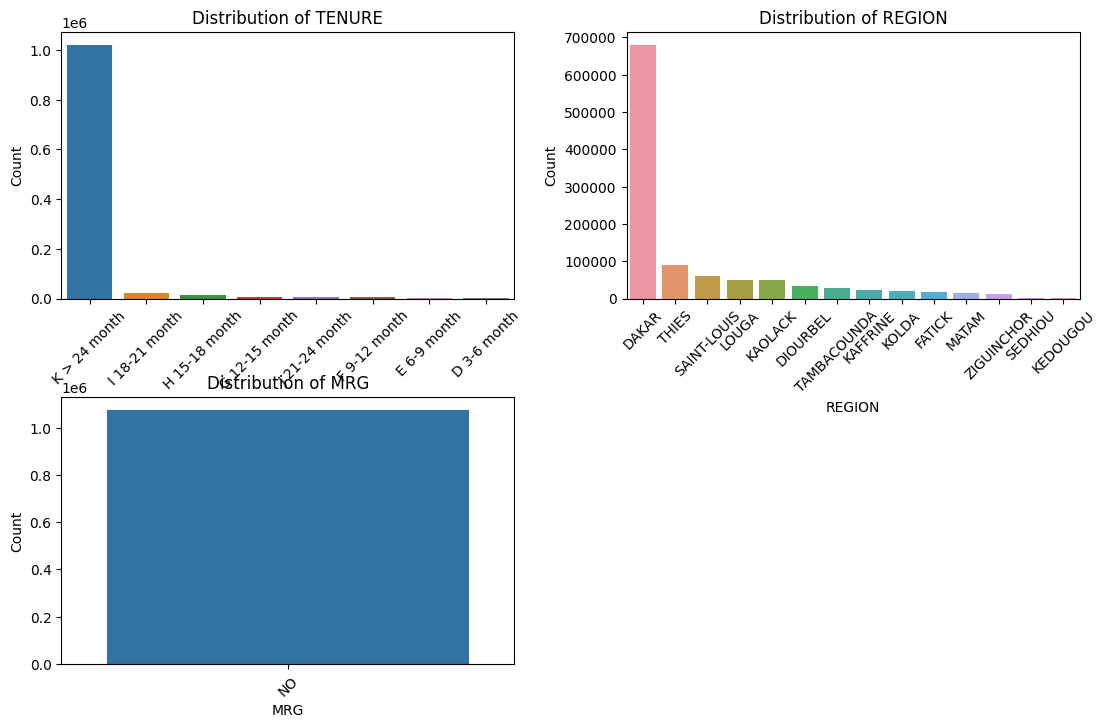

In [62]:
# Plotting distribution for the top 15 values in the categorical columns
plot_categorical_distribution(train, categorical_columns, ncols=2, top_n=15)


In [63]:
# Correlation for numerical columns

corr_matrix = train.corr()

<Figure size 5000x2500 with 0 Axes>

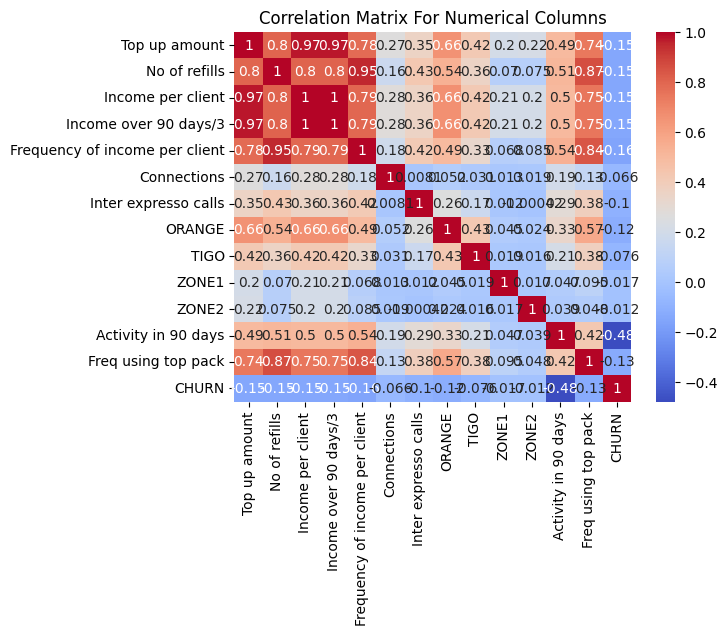

<Figure size 5000x2500 with 0 Axes>

In [64]:
# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix For Numerical Columns')
plt.figure(figsize=(50, 25))

# Feature Engineering and Preprocessing

In [65]:
# Separating the target variable.

train_prepared = train.drop('CHURN', axis=1)

In [66]:
train_prepared

,REGION,TENURE,Top up amount,No of refills,Income per client,Income over 90 days/3,Frequency of income per client,Connections,Inter expresso calls,ORANGE,TIGO,ZONE1,ZONE2,MRG,Activity in 90 days,TOP_PACK,Freq using top pack
0,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,1.0,2.0,NO,62,On net 200F=Unlimited _call24H,30.0
1,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,258.0,27.0,29.0,6.0,1.0,2.0,NO,3,All-net 500F=2000F,5.0
2,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,258.0,27.0,29.0,6.0,1.0,2.0,NO,1,All-net 500F=2000F,5.0
3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,1.0,2.0,NO,61,"Data:490F=1GB,7d",7.0
4,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,1.0,2.0,NO,56,All-net 500F=2000F;5d,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,258.0,27.0,29.0,6.0,1.0,2.0,NO,16,All-net 500F=2000F,5.0
1077020,TAMBACOUNDA,K > 24 month,2500.0,5.0,2500.0,833.0,5.0,0.0,15.0,77.0,6.0,1.0,2.0,NO,34,All-net 500F=2000F;5d,2.0
1077021,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,258.0,27.0,29.0,6.0,1.0,2.0,NO,3,All-net 500F=2000F,5.0
1077022,DAKAR,K > 24 month,600.0,1.0,600.0,200.0,1.0,591.0,11.0,37.0,5.0,1.0,2.0,NO,16,All-net 600F= 3000F ;5d,1.0


In [67]:
# Check for duplicates
train_prepared_duplicates = train_prepared.duplicated()
print(train_prepared[train_prepared_duplicates])

        REGION        TENURE  Top up amount  No of refills  Income per client  \
14       DAKAR  K > 24 month         3000.0            7.0             3000.0   
31       DAKAR  K > 24 month         3000.0            7.0             3000.0   
41       DAKAR  K > 24 month         3000.0            7.0             3000.0   
42       DAKAR  K > 24 month         3000.0            7.0             3000.0   
53       DAKAR  K > 24 month         3000.0            7.0             3000.0   
...        ...           ...            ...            ...                ...   
1077008  DAKAR  K > 24 month         3000.0            7.0             3000.0   
1077012  DAKAR  K > 24 month         3000.0            7.0             3000.0   
1077018  DAKAR  K > 24 month         3000.0            7.0             3000.0   
1077019  DAKAR  K > 24 month         3000.0            7.0             3000.0   
1077021  DAKAR  K > 24 month         3000.0            7.0             3000.0   

         Income over 90 day

The data has 322141 rows with duplicated data.

In [68]:
# Checking the values in the TOP_PACK column

train_prepared['TOP_PACK'].unique()

array(['On net 200F=Unlimited _call24H', 'All-net 500F=2000F',
       'Data:490F=1GB,7d', 'All-net 500F=2000F;5d', 'On-net 500=4000,10d',
       'Data:3000F=10GB,30d', 'Data:200F=Unlimited,24H',
       'IVR Echat_Daily_50F', 'Data:1000F=2GB,30d',
       'Mixt 250F=Unlimited_call24H', 'On-net 1000F=10MilF;10d',
       'MIXT:500F= 2500F on net _2500F off net;2d',
       'Data: 200 F=100MB,24H', 'All-net 600F= 3000F ;5d',
       'On-net 200F=60mn;1d', 'Twter_U2opia_Daily',
       'Data: 100 F=40MB,24H', 'All-net 500F =2000F_AllNet_Unlimited',
       'On net 200F= 3000F_10Mo ;24H', '200=Unlimited1Day', 'Jokko_Daily',
       'Data:1000F=5GB,7d', 'Data:700F=1.5GB,7d', 'All-net 1000=5000;5d',
       'Data:150F=SPPackage1,24H', 'IVR Echat_Monthly_500F',
       'VAS(IVR_Radio_Daily)', 'MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t',
       'MIXT: 200mnoff net _unl on net _5Go;30d', 'On-net 500F_FNF;3d',
       'MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t',
       'Data:1500F=3GB,30D', 'Data:300F=100M

In [69]:
top_pack = train_prepared.loc[train_prepared['TOP_PACK']== 'TOP_PACK']
top_pack

,REGION,TENURE,Top up amount,No of refills,Income per client,Income over 90 days/3,Frequency of income per client,Connections,Inter expresso calls,ORANGE,TIGO,ZONE1,ZONE2,MRG,Activity in 90 days,TOP_PACK,Freq using top pack


# Feature Encoding

We will use the OneHot Encoder for categorical columns and label encoder for the target column.

In [70]:
# Cleaning the categorical columns.

train_prepared['REGION'].unique()

array(['DAKAR', 'SAINT-LOUIS', 'THIES', 'LOUGA', 'MATAM', 'FATICK',
       'KAOLACK', 'DIOURBEL', 'TAMBACOUNDA', 'ZIGUINCHOR', 'KOLDA',
       'KAFFRINE', 'SEDHIOU', 'KEDOUGOU'], dtype=object)

In [71]:
train_prepared['TENURE'].unique()

array(['K > 24 month', 'E 6-9 month', 'H 15-18 month', 'G 12-15 month',
       'I 18-21 month', 'J 21-24 month', 'F 9-12 month', 'D 3-6 month'],
      dtype=object)

In [72]:
train_prepared['MRG'].unique()

array(['NO'], dtype=object)

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 18 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   REGION                          1077024 non-null  object 
 1   TENURE                          1077024 non-null  object 
 2   Top up amount                   1077024 non-null  float64
 3   No of refills                   1077024 non-null  float64
 4   Income per client               1077024 non-null  float64
 5   Income over 90 days/3           1077024 non-null  float64
 6   Frequency of income per client  1077024 non-null  float64
 7   Connections                     1077024 non-null  float64
 8   Inter expresso calls            1077024 non-null  float64
 9   ORANGE                          1077024 non-null  float64
 10  TIGO                            1077024 non-null  float64
 11  ZONE1                           1077024 non-null  float64
 12  

In [74]:
# Grouping all categorical and numerical columns into one variable.

cat_cols = ['REGION','TENURE','MRG']

num_cols = ['Top up amount','No of refills','Income per client','Income over 90 days/3','Frequency of income per client','Connections','Inter expresso calls','ORANGE','TIGO','ZONE1','ZONE2','Activity in 90 days','Freq using top pack']

In [75]:
# Instanciating encoder instance.

cat_encoder= OneHotEncoder(drop="first")

In [76]:
# Fitting encoder to categorical columns  in train and test.

train_encoded_data = cat_encoder.fit_transform(train_prepared[cat_cols])
train_encoded_data

<1077024x20 sparse matrix of type '<class 'numpy.float64'>'
	with 1473065 stored elements in Compressed Sparse Row format>

In [77]:
test_encoded_data = cat_encoder.fit_transform(test[cat_cols])
test_encoded_data

<190063x20 sparse matrix of type '<class 'numpy.float64'>'
	with 259958 stored elements in Compressed Sparse Row format>

In [78]:
#Converting encoded array to df
train_encoded_df = pd.DataFrame(train_encoded_data.toarray(), columns=cat_encoder.get_feature_names_out(['REGION','TENURE','MRG']))
train_encoded_df

,REGION_DIOURBEL,REGION_FATICK,REGION_KAFFRINE,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1077020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1077021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1077022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [79]:
#Converting encoded array to df
test_encoded_df = pd.DataFrame(test_encoded_data.toarray(), columns=cat_encoder.get_feature_names_out(['REGION','TENURE','MRG']))
test_encoded_df

,REGION_DIOURBEL,REGION_FATICK,REGION_KAFFRINE,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
190059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
190060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
190061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [80]:
# Encoding the target column using label encoder.

le = LabelEncoder()
target = train['CHURN']
y = le.fit_transform(target)

# Feature Scaling

We will use the Standardscaler() for numerical columns to even out the distribution.

In [81]:
# Instanciating the scaler.

scaler = StandardScaler()

In [82]:
# Fitting it to numerical columns for train and test.

train_scaled_data = StandardScaler().fit_transform(train_prepared[num_cols])

In [83]:
test_scaled_data = StandardScaler().fit_transform(test[num_cols])

In [84]:
# Converting the array to a df.

train_scaled_df = pd.DataFrame(train_scaled_data, columns=scaler.get_feature_names_out(['Top up amount','No of refills','Income per client','Income over 90 days/3','Frequency of income per client','Connections','Inter expresso calls','ORANGE','TIGO','ZONE1','ZONE2','Activity in 90 days','Freq using top pack']))
train_scaled_df

,Top up amount,No of refills,Income per client,Income over 90 days/3,Frequency of income per client,Connections,Inter expresso calls,ORANGE,TIGO,ZONE1,ZONE2,Activity in 90 days,Freq using top pack
0,2.625285,3.400019,2.840258,2.840428,3.255997,0.750252,4.533492,2.069454,4.155388,-0.050506,-0.039525,1.523447,2.353830
1,-0.280646,-0.269385,-0.278829,-0.278831,-0.270724,-0.169503,-0.224577,-0.243898,-0.165720,-0.050506,-0.039525,-1.123646,-0.258979
2,-0.280646,-0.269385,-0.278829,-0.278831,-0.270724,-0.169503,-0.224577,-0.243898,-0.165720,-0.050506,-0.039525,-1.213378,-0.258979
3,0.556945,0.831437,0.542107,0.542106,1.041544,0.809232,-0.224577,-0.136740,0.172244,-0.050506,-0.039525,1.478581,-0.049955
4,1.317616,1.014907,1.289099,1.289098,1.369612,0.806551,-0.169415,0.216251,0.510207,-0.050506,-0.039525,1.254251,0.368095
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,-0.280646,-0.269385,-0.278829,-0.278831,-0.270724,-0.169503,-0.224577,-0.243898,-0.165720,-0.050506,-0.039525,-0.540388,-0.258979
1077020,-0.366115,-0.452855,-0.362666,-0.362836,-0.598791,-0.197170,-0.241550,0.058665,-0.165720,-0.050506,-0.039525,0.267200,-0.572516
1077021,-0.280646,-0.269385,-0.278829,-0.278831,-0.270724,-0.169503,-0.224577,-0.243898,-0.165720,-0.050506,-0.039525,-1.123646,-0.258979
1077022,-0.690896,-0.819795,-0.681248,-0.681251,-0.926858,-0.133794,-0.247207,-0.193471,-0.189860,-0.050506,-0.039525,-0.540388,-0.677029


In [85]:
# Converting the array to a df.

test_scaled_df = pd.DataFrame(test_scaled_data, columns=scaler.get_feature_names_out(['Top up amount','No of refills','Income per client','Income over 90 days/3','Frequency of income per client','Connections','Inter expresso calls','ORANGE','TIGO','ZONE1','ZONE2','Activity in 90 days','Freq using top pack']))
test_scaled_df

,Top up amount,No of refills,Income per client,Income over 90 days/3,Frequency of income per client,Connections,Inter expresso calls,ORANGE,TIGO,ZONE1,ZONE2,Activity in 90 days,Freq using top pack
0,-0.366079,-0.453427,-0.363031,-0.363202,-0.599540,-0.211016,-0.173644,0.018616,-0.162494,-0.042841,-0.047286,0.309422,-0.259380
1,-0.280197,-0.269040,-0.278752,-0.278754,-0.270378,-0.180611,-0.225235,-0.246291,-0.162494,-0.042841,-0.047286,-1.171084,-0.259380
2,-0.280197,-0.269040,-0.278752,-0.278754,-0.270378,-0.211016,-0.225235,-0.246291,-0.162494,-0.042841,-0.047286,-0.273808,-0.259380
3,-0.280197,-0.269040,-0.278752,-0.278754,-0.270378,-0.180611,-0.225235,-0.246291,-0.162494,-0.042841,-0.047286,-0.991629,-0.259380
4,0.080508,-0.269040,0.165737,0.165735,0.223364,0.681982,-0.221052,-0.271520,-0.305279,-0.119685,-0.047286,1.431017,-0.364483
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190058,-0.709608,-0.822202,-0.699137,-0.698971,-0.928701,-0.211016,-0.226630,-0.246291,-0.162494,0.341380,-0.047286,-0.632718,-0.679793
190059,-0.451962,-0.545621,-0.447310,-0.447144,-0.599540,-0.211016,-0.251728,-0.082301,-0.162494,-0.042841,-0.047286,0.040239,-0.469586
190060,-0.280197,-0.269040,-0.278752,-0.278754,-0.270378,-0.180611,-0.225235,-0.246291,-0.162494,-0.042841,-0.047286,-1.171084,-0.259380
190061,-0.743961,-0.730009,-0.734197,-0.734368,-0.846411,-0.211016,-0.261489,-0.410282,-0.162494,-0.042841,-0.047286,-0.722446,-0.259380


In [86]:
# Concatinating the numerical and categorical cols.

X = pd.concat([pd.DataFrame(train_scaled_df, columns=['Top up amount','No of refills','Income per client','Income over 90 days/3','Frequency of income per client','Connections','Inter expresso calls','ORANGE','TIGO','ZONE1','ZONE2','Activity in 90 days','Freq using top pack']), train_encoded_df], axis=1)
X

,Top up amount,No of refills,Income per client,Income over 90 days/3,Frequency of income per client,Connections,Inter expresso calls,ORANGE,TIGO,ZONE1,...,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,2.625285,3.400019,2.840258,2.840428,3.255997,0.750252,4.533492,2.069454,4.155388,-0.050506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.280646,-0.269385,-0.278829,-0.278831,-0.270724,-0.169503,-0.224577,-0.243898,-0.165720,-0.050506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.280646,-0.269385,-0.278829,-0.278831,-0.270724,-0.169503,-0.224577,-0.243898,-0.165720,-0.050506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.556945,0.831437,0.542107,0.542106,1.041544,0.809232,-0.224577,-0.136740,0.172244,-0.050506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.317616,1.014907,1.289099,1.289098,1.369612,0.806551,-0.169415,0.216251,0.510207,-0.050506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,-0.280646,-0.269385,-0.278829,-0.278831,-0.270724,-0.169503,-0.224577,-0.243898,-0.165720,-0.050506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1077020,-0.366115,-0.452855,-0.362666,-0.362836,-0.598791,-0.197170,-0.241550,0.058665,-0.165720,-0.050506,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1077021,-0.280646,-0.269385,-0.278829,-0.278831,-0.270724,-0.169503,-0.224577,-0.243898,-0.165720,-0.050506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1077022,-0.690896,-0.819795,-0.681248,-0.681251,-0.926858,-0.133794,-0.247207,-0.193471,-0.189860,-0.050506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [87]:
# Concatinating the numerical and categorical cols.

X_test = pd.concat([pd.DataFrame(test_scaled_df, columns=['Top up amount','No of refills','Income per client','Income over 90 days/3','Frequency of income per client','Connections','Inter expresso calls','ORANGE','TIGO','ZONE1','ZONE2','Activity in 90 days','Freq using top pack']), test_encoded_df], axis=1)
X_test

,Top up amount,No of refills,Income per client,Income over 90 days/3,Frequency of income per client,Connections,Inter expresso calls,ORANGE,TIGO,ZONE1,...,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,-0.366079,-0.453427,-0.363031,-0.363202,-0.599540,-0.211016,-0.173644,0.018616,-0.162494,-0.042841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.280197,-0.269040,-0.278752,-0.278754,-0.270378,-0.180611,-0.225235,-0.246291,-0.162494,-0.042841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.280197,-0.269040,-0.278752,-0.278754,-0.270378,-0.211016,-0.225235,-0.246291,-0.162494,-0.042841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.280197,-0.269040,-0.278752,-0.278754,-0.270378,-0.180611,-0.225235,-0.246291,-0.162494,-0.042841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.080508,-0.269040,0.165737,0.165735,0.223364,0.681982,-0.221052,-0.271520,-0.305279,-0.119685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190058,-0.709608,-0.822202,-0.699137,-0.698971,-0.928701,-0.211016,-0.226630,-0.246291,-0.162494,0.341380,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
190059,-0.451962,-0.545621,-0.447310,-0.447144,-0.599540,-0.211016,-0.251728,-0.082301,-0.162494,-0.042841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
190060,-0.280197,-0.269040,-0.278752,-0.278754,-0.270378,-0.180611,-0.225235,-0.246291,-0.162494,-0.042841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
190061,-0.743961,-0.730009,-0.734197,-0.734368,-0.846411,-0.211016,-0.261489,-0.410282,-0.162494,-0.042841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Dataset Splitting

In this section we'll split the dataset to train and evaluation sets.

In [88]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
X_train.shape

(861619, 33)

In [90]:
y_train.shape

(861619,)

In [91]:
X_eval.shape

(215405, 33)

In [92]:
y_eval.shape

(215405,)

Since our dataset is imbalaced we will apply SMOTE to the training data to generate synthetic samples for the minority class.

In [93]:
# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Modelling.

We will train various models using the train data and use the evaluation set to determine how well the model is performing.

1. Gradient Boosting Methods

In [94]:
# Gradient Boosting Methods instanciating.

GBM_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)


In [95]:
GBM_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [96]:
# Get the feature importance scores
importances = GBM_model.feature_importances_

In [97]:
# Sort the features by importance score
sorted_indices = np.argsort(importances)[::-1]

In [98]:
# Print the feature ranking
print("Feature ranking:")
for i in sorted_indices:
    print(f"{i+1}. Feature {i} ({importances[i]:.4f})")

Feature ranking:
12. Feature 11 (0.2810)
25. Feature 24 (0.0567)
17. Feature 16 (0.0512)
20. Feature 19 (0.0507)
14. Feature 13 (0.0487)
22. Feature 21 (0.0466)
1. Feature 0 (0.0416)
8. Feature 7 (0.0406)
10. Feature 9 (0.0387)
7. Feature 6 (0.0386)
9. Feature 8 (0.0353)
24. Feature 23 (0.0346)
4. Feature 3 (0.0328)
16. Feature 15 (0.0314)
19. Feature 18 (0.0300)
15. Feature 14 (0.0296)
21. Feature 20 (0.0290)
26. Feature 25 (0.0266)
2. Feature 1 (0.0207)
5. Feature 4 (0.0167)
6. Feature 5 (0.0152)
3. Feature 2 (0.0022)
13. Feature 12 (0.0015)
33. Feature 32 (0.0001)
11. Feature 10 (0.0000)
31. Feature 30 (0.0000)
27. Feature 26 (0.0000)
30. Feature 29 (0.0000)
32. Feature 31 (0.0000)
18. Feature 17 (0.0000)
29. Feature 28 (0.0000)
28. Feature 27 (0.0000)
23. Feature 22 (0.0000)


In [99]:
# Select the top k features
k = 10
selected_features = sorted_indices[:k]
selected_features

array([11, 24, 16, 19, 13, 21,  0,  7,  9,  6])

In [100]:
# Train a new classifier using only the selected features
X_train_selected = X_train_resampled.iloc[:, selected_features]
gbm_model_selected = xgb.XGBClassifier(objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3)
gbm_model_selected.fit(X_train_selected, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [101]:
# making sure that the eval set has the same columns as the training set before slicing it with selected_features
X_eval_selected = X_eval.iloc[:, selected_features]

In [102]:
# using X_eval_selected to make predictions using the trained model:
y_gbm_pred = gbm_model_selected.predict(X_eval_selected)

In [103]:
#classification report for your model's performance on the eval set.
print(classification_report(y_eval, y_gbm_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88    174959
           1       0.52      0.86      0.64     40446

    accuracy                           0.82    215405
   macro avg       0.74      0.84      0.76    215405
weighted avg       0.88      0.82      0.84    215405



In [104]:
# Compute AUC Metric

auc = roc_auc_score(y_eval, y_gbm_pred)  # Use the predicted probabilities for the positive class
print("AUC:", auc)


AUC: 0.8350313550067558


In [105]:
# making sure that the test set has the same columns as the training set before slicing it with selected_features
X_test_selected = X_test.iloc[:, selected_features]

In [106]:
# using X_test_selected to make predictions using your trained model:
y_gbm_test_pred = gbm_model_selected.predict(X_test_selected)

In [107]:
y_gbm_test_pred

array([0, 1, 0, ..., 1, 1, 1])

2. K-nearest neighbors (KNN) algorithm

In [108]:
# Instanciating and training.

KNN_model = KNeighborsClassifier(n_neighbors=5)  # Specify the number of neighbors (K)

KNN_model.fit(X_train_selected, y_train_resampled)


KNeighborsClassifier()

In [109]:
# using X_eval_selected to make predictions using the trained model:
y_knn_pred = KNN_model.predict(X_eval_selected)

In [110]:
#classification report for your model's performance on the eval set.
print(classification_report(y_eval, y_knn_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90    174959
           1       0.55      0.60      0.58     40446

    accuracy                           0.83    215405
   macro avg       0.73      0.74      0.74    215405
weighted avg       0.84      0.83      0.84    215405



In [111]:
# using X_test_selected to make predictions using your trained model:
y_knn_test_pred = gbm_model_selected.predict(X_test_selected)

In [112]:
#classification report for your model's performance on the eval set.
print(classification_report(y_eval, y_knn_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90    174959
           1       0.55      0.60      0.58     40446

    accuracy                           0.83    215405
   macro avg       0.73      0.74      0.74    215405
weighted avg       0.84      0.83      0.84    215405



In [113]:
# Compute AUC Metric

auc = roc_auc_score(y_eval, y_knn_pred)  # Use the predicted probabilities for the positive class
print("AUC:", auc)

AUC: 0.7449513507810316


3. Random Forest

In [114]:
# Instanciating and training

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Specify the number of trees in the forest

rf_model.fit(X_train_selected, y_train_resampled)


RandomForestClassifier(random_state=42)

In [115]:
# using X_eval_selected to make predictions using the trained model:
y_rf_pred = rf_model.predict(X_eval_selected)

In [116]:
#classification report for your model's performance on the eval set.
print(classification_report(y_eval, y_rf_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89    174959
           1       0.52      0.83      0.64     40446

    accuracy                           0.83    215405
   macro avg       0.74      0.83      0.76    215405
weighted avg       0.87      0.83      0.84    215405



In [117]:
# Compute AUC Metric

auc = roc_auc_score(y_eval, y_rf_pred)  # Use the predicted probabilities for the positive class
print("AUC:", auc)

AUC: 0.8259168250165073


In [118]:
# using X_test_selected to make predictions using your trained model:
y_rf_test_pred = rf_model.predict(X_test_selected)

In [119]:
y_rf_test_pred

array([1, 1, 1, ..., 1, 1, 1])

# Model Comparison

We measure the performance of each model.

In [120]:
# A list to store the models

models = []

In [121]:
# Appending to the list
models.append('RFC')

In [122]:
models.append('GBM')

In [123]:
models.append('KNN')

In [124]:
rfc_metrics = {'f1-score_0': 0.89, 'precision_0': 0.95, 'recall_0': 0.83, 'f1-score_1':0.64, 'precision_1': 0.52, 'recall_1':0.83}

In [125]:
gbm_metrics = {'f1-score_0': 0.88, 'precision_0': 0.96, 'recall_0': 0.81, 'f1-score_1':0.64, 'precision_1': 0.52, 'recall_1':0.86}

In [126]:
knn_metrics = {'f1-score_0': 0.91, 'precision_0': 0.91, 'recall_0': 0.91, 'f1-score_1':0.59, 'precision_1': 0.60, 'recall_1':0.59}

In [145]:
auc_GBM = {'GBM_AUC':0.84,}

In [146]:
auc_KNN = {'KNN_AUC':0.745}

In [147]:
auc_RFC = {'RFC_AUC':0.83,}

In [127]:
# Metrics that will be used for evaluation.
metrics_list = [rfc_metrics, gbm_metrics, knn_metrics]

In [148]:
auc_metrics_list = [auc_GBM,auc_KNN,auc_RFC]

In [128]:
combined_metrics = []
for i, m in enumerate(metrics_list):
    m['model'] = models[i]
    combined_metrics.append(m)

In [149]:
auc_combined_metrics = []
for i, m in enumerate(auc_metrics_list):
    m['model'] = models[i]
    auc_combined_metrics.append(m)

In [129]:
# Creating a comparison df
metrics_df = pd.DataFrame(combined_metrics)
metrics_df.set_index('model', inplace=True)

In [150]:
# Creating a comparison df
auc_metrics_df = pd.DataFrame(auc_combined_metrics)
auc_metrics_df.set_index('model', inplace=True)

In [130]:
metrics_df

,f1-score_0,precision_0,recall_0,f1-score_1,precision_1,recall_1
model,,,,,,
RFC,0.89,0.95,0.83,0.64,0.52,0.83
GBM,0.88,0.96,0.81,0.64,0.52,0.86
KNN,0.91,0.91,0.91,0.59,0.60,0.59


The model seem better at predicting possibility of not churning than possibility of churn.

In [151]:
auc_metrics_df

,GBM_AUC,KNN_AUC,RFC_AUC
model,,,
RFC,0.84,NaN,NaN
GBM,NaN,0.745,NaN
KNN,NaN,NaN,0.83


The model with the highest score for Area Under the Curve(AUC) is Gradient Boosting Methods.